<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/saddle_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lagragian

Running constrained optimization for f(x,y) = x² + y² - xy with constraint x + y <= 1

Start: (0.5, 0.5)
Final point: (0.000022, 0.000022)
Final loss: 0.000000
Constraint satisfied: True

Start: (1.5, 0.5)
Final point: (0.000023, 0.000023)
Final loss: 0.000000
Constraint satisfied: True

Start: (-0.5, 1.5)
Final point: (0.000022, 0.000022)
Final loss: 0.000000
Constraint satisfied: True

Start: (0.0, 0.0)
Final point: (0.000000, 0.000000)
Final loss: 0.000000
Constraint satisfied: True


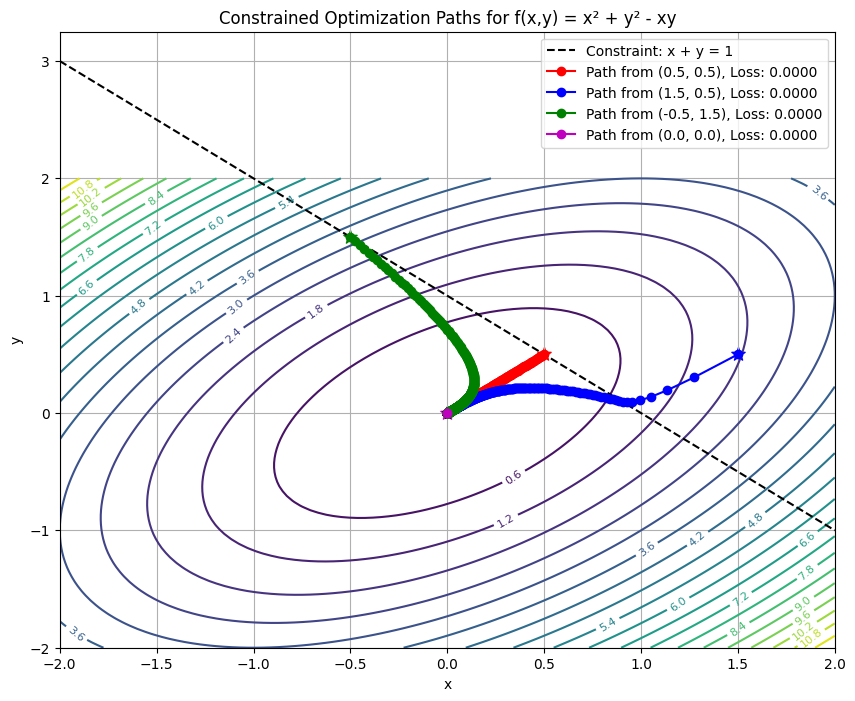

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function(x, y):
    return x**2 + y**2 - x*y

def constraint(x, y):
    return x + y - 1

def penalty_function(x, y, mu=10):
    constraint_val = constraint(x, y)
    penalty = mu * max(0, constraint_val)**2
    return function(x, y) + penalty

def gradient(x, y, mu=10):
    df_dx = 2*x - y
    df_dy = 2*y - x
    constraint_val = constraint(x, y)
    if constraint_val > 0:
        df_dx += 2 * mu * constraint_val
        df_dy += 2 * mu * constraint_val
    return np.array([df_dx, df_dy])

def gradient_descent(start_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    losses = [penalty_function(start_point[0], start_point[1])]
    point = np.array(start_point, dtype=float)

    for _ in range(max_iterations):
        grad = gradient(point[0], point[1])
        new_point = point - learning_rate * grad
        new_loss = penalty_function(new_point[0], new_point[1])

        path.append(new_point)
        losses.append(new_loss)

        if np.linalg.norm(grad) < tolerance:
            break
        point = new_point

    return np.array(path), losses

def plot_optimization_paths():
    starting_points = [(0.5, 0.5), (1.5, 0.5), (-0.5, 1.5), (0.0, 0.0)]
    colors = ['r', 'b', 'g', 'm']

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)

    x_constraint = np.linspace(-2, 2, 100)
    y_constraint = 1 - x_constraint
    plt.plot(x_constraint, y_constraint, 'k--', label='Constraint: x + y = 1')

    for i, start in enumerate(starting_points):
        path, losses = gradient_descent(start)
        plt.plot(path[:, 0], path[:, 1], f'{colors[i]}o-', label=f'Path from {start}, Loss: {losses[-1]:.4f}')
        plt.scatter(start[0], start[1], c=colors[i], s=100, marker='*')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Constrained Optimization Paths for f(x,y) = x² + y² - xy')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    print("Running constrained optimization for f(x,y) = x² + y² - xy with constraint x + y <= 1")
    starting_points = [(0.5, 0.5), (1.5, 0.5), (-0.5, 1.5), (0.0, 0.0)]

    for start in starting_points:
        path, losses = gradient_descent(start)
        print(f"\nStart: {start}")
        print(f"Final point: ({path[-1, 0]:.6f}, {path[-1, 1]:.6f})")
        print(f"Final loss: {losses[-1]:.6f}")
        print(f"Constraint satisfied: {constraint(path[-1, 0], path[-1, 1]) <= 0}")

    plot_optimization_paths()

if __name__ == "__main__":
    main()


Running constrained optimization for f(x,y) = x² + y² - xy
Constraints: x + y = 1 (equality), x² + y² ≤ 2 (inequality)

Start: (0.5, 0.5) (projected to x + y = 1)
Final point: (0.500000, 0.500000)
Final loss: 0.250000
Steps to converge: 1
Equality constraint satisfied: True
Inequality constraint satisfied: True

Start: (1.5, 0.5) (projected to x + y = 1)
Final point: (0.498438, 0.501562)
Final loss: 0.250007
Steps to converge: 6
Equality constraint satisfied: True
Inequality constraint satisfied: True

Start: (-0.5, 1.5) (projected to x + y = 1)
Final point: (0.501498, 0.498502)
Final loss: 0.250007
Steps to converge: 8
Equality constraint satisfied: True
Inequality constraint satisfied: True

Start: (0.0, 0.0) (projected to x + y = 1)
Final point: (0.500000, 0.500000)
Final loss: 0.250000
Steps to converge: 1
Equality constraint satisfied: True
Inequality constraint satisfied: True


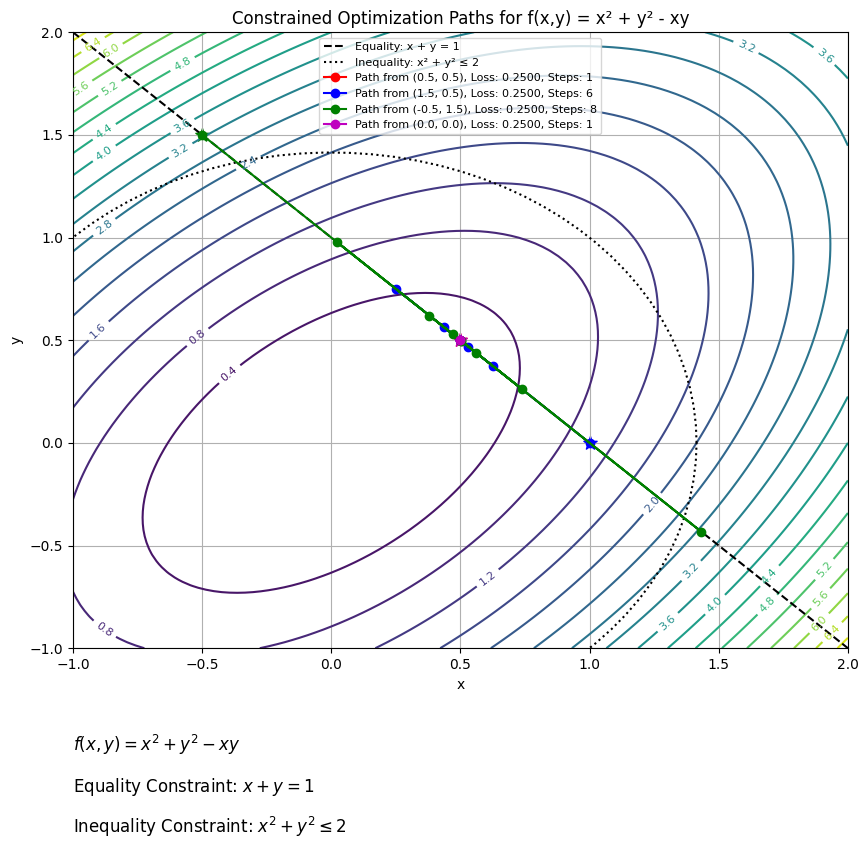

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def function(x, y):
    return x**2 + y**2 - x*y

def equality_constraint(x, y):
    # Equality constraint: x + y = 1
    return x + y - 1

def inequality_constraint(x, y):
    # Inequality constraint: x^2 + y^2 <= 2
    return x**2 + y**2 - 2

def penalty_function(x, y, mu_ineq=10):
    # Penalized objective function with inequality constraint
    ineq_val = inequality_constraint(x, y)
    ineq_penalty = mu_ineq * max(0, ineq_val)**2
    return function(x, y) + ineq_penalty

def gradient(x, y, mu_ineq=10):
    # Gradient of the function with penalty for inequality constraint
    df_dx = 2*x - y
    df_dy = 2*y - x
    ineq_val = inequality_constraint(x, y)
    if ineq_val > 0:
        df_dx += 2 * mu_ineq * ineq_val * 2*x
        df_dy += 2 * mu_ineq * ineq_val * 2*y
    return np.array([df_dx, df_dy])

def project_to_equality(x, y):
    # Project point onto x + y = 1
    t = (1 - x - y) / 2
    return x + t, y + t

def line_search(point, grad, max_step=0.5, c1=0.01, rho=0.7):
    # Line search with stricter Armijo condition
    step = max_step
    x, y = point
    f_current = penalty_function(x, y)
    grad_norm = np.dot(grad, grad)

    while True:
        new_point = point - step * grad
        x_new, y_new = project_to_equality(new_point[0], new_point[1])
        f_new = penalty_function(x_new, y_new)
        if f_new <= f_current - c1 * step * grad_norm:
            return step
        step *= rho
        if step < 1e-8:
            return step

def gradient_descent(start_point, max_iterations=1000, tolerance=1e-6):
    # Start on the equality constraint surface
    x, y = project_to_equality(start_point[0], start_point[1])
    path = [(x, y)]
    losses = [penalty_function(x, y)]
    point = np.array([x, y], dtype=float)
    iteration = 0

    for i in range(max_iterations):
        grad = gradient(point[0], point[1])
        step_size = line_search(point, grad)
        new_point = point - step_size * grad
        x_new, y_new = project_to_equality(new_point[0], new_point[1])
        new_point = np.array([x_new, y_new])
        new_loss = penalty_function(x_new, y_new)

        path.append(new_point)
        losses.append(new_loss)
        iteration = i + 1

        if np.linalg.norm(grad) < tolerance or abs(new_loss - losses[-2]) < tolerance:
            break
        point = new_point

    return np.array(path), losses, iteration

def plot_optimization_paths():
    starting_points = [(0.5, 0.5), (1.5, 0.5), (-0.5, 1.5), (0.0, 0.0)]
    colors = ['r', 'b', 'g', 'm']

    x = np.linspace(-1, 2, 100)
    y = np.linspace(-1, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)

    # Plot equality constraint: x + y = 1
    x_line = np.linspace(-1, 2, 100)
    y_line = 1 - x_line
    plt.plot(x_line, y_line, 'k--', label='Equality: x + y = 1')

    # Plot inequality constraint boundary: x^2 + y^2 = 2
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = np.sqrt(2) * np.cos(theta)
    y_circle = np.sqrt(2) * np.sin(theta)
    plt.plot(x_circle, y_circle, 'k:', label='Inequality: x² + y² ≤ 2')

    for i, start in enumerate(starting_points):
        path, losses, steps = gradient_descent(start)
        plt.plot(path[:, 0], path[:, 1], f'{colors[i]}o-', label=f'Path from {start}, Loss: {losses[-1]:.4f}, Steps: {steps}')
        x_start, y_start = project_to_equality(start[0], start[1])
        plt.scatter(x_start, y_start, c=colors[i], s=100, marker='*')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Constrained Optimization Paths for f(x,y) = x² + y² - xy')
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)

    # Add equations below the plot
    plt.text(-1, -1.5, r'$f(x,y) = x^2 + y^2 - xy$', fontsize=12, ha='left')
    plt.text(-1, -1.7, r'Equality Constraint: $x + y = 1$', fontsize=12, ha='left')
    plt.text(-1, -1.9, r'Inequality Constraint: $x^2 + y^2 \leq 2$', fontsize=12, ha='left')

    plt.show()

def main():
    print("Running constrained optimization for f(x,y) = x² + y² - xy")
    print("Constraints: x + y = 1 (equality), x² + y² ≤ 2 (inequality)")
    starting_points = [(0.5, 0.5), (1.5, 0.5), (-0.5, 1.5), (0.0, 0.0)]

    for start in starting_points:
        path, losses, steps = gradient_descent(start)
        print(f"\nStart: {start} (projected to x + y = 1)")
        print(f"Final point: ({path[-1, 0]:.6f}, {path[-1, 1]:.6f})")
        print(f"Final loss: {losses[-1]:.6f}")
        print(f"Steps to converge: {steps}")
        print(f"Equality constraint satisfied: {abs(equality_constraint(path[-1, 0], path[-1, 1])) < 1e-3}")
        print(f"Inequality constraint satisfied: {inequality_constraint(path[-1, 0], path[-1, 1]) <= 0}")

    plot_optimization_paths()

if __name__ == "__main__":
    main()

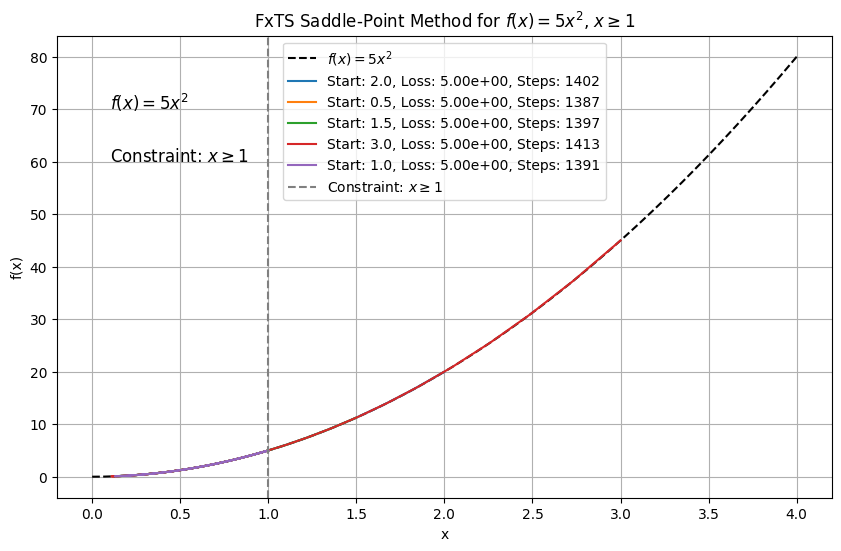

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective and constraint
def f(x):
    return 5 * x**2

def grad_f(x):
    return 10 * x

def g(x):
    return 1 - x  # Constraint: x >= 1 → g(x) <= 0

def grad_L_x(x, mu):
    return grad_f(x) - mu  # ∇ₓ L = ∇f - μ

def grad_L_mu(x):
    return g(x)  # ∇μ L = g(x) = 1 - x

# Fixed-time saddle-point dynamics
def fx_time_saddle(start_x, start_mu=1.0, eta=0.01,
                   p1=2.1, p2=3.0, c1=1.0, c2=1.0,
                   tol=1e-3, max_steps=4000):
    x = start_x
    mu = start_mu
    eps = 1e-8
    path = [x]
    losses = [f(x)]
    prev_gx_vals = []
    for step in range(max_steps):
        gx = grad_L_x(x, mu)
        gmu = grad_L_mu(x)

        norm_gx = abs(gx) + eps
        norm_gmu = abs(gmu) + eps
        prev_gx_vals = np.append(prev_gx_vals, norm_gx)

        if len(prev_gx_vals) >= 10 and np.std(prev_gx_vals[-10:]) < 1e-6:
          break

        delta_x = (c1 * gx / norm_gx**((p1 - 2)/(p1 - 1)) +
                   c2 * gx / norm_gx**((p2 - 2)/(p2 - 1)))
        delta_mu = (c1 * gmu / norm_gmu**((p1 - 2)/(p1 - 1)) +
                    c2 * gmu / norm_gmu**((p2 - 2)/(p2 - 1)))

        # Saddle dynamics: x → minimize, mu → maximize
        x = x - eta * delta_x
        mu = max(0, mu + eta * delta_mu)

        path.append(x)
        losses.append(f(x))

        if abs(grad_L_x(x, mu)) < tol and abs(g(x)) < tol:
            break

    return np.array(path), np.array(losses), step + 1

# Run for multiple initial points
starts = [2.0, 0.5, 1.5, 3.0, 1.0]
results = [fx_time_saddle(x0) for x0 in starts]

# Plot
plt.figure(figsize=(10, 6))
x_vals = np.linspace(0, 4, 400)
plt.plot(x_vals, f(x_vals), 'k--', label=r'$f(x) = 5x^2$')

for i, (x0, (path, losses, steps)) in enumerate(zip(starts, results)):
    plt.plot(path, f(path), label=f"Start: {x0}, Loss: {losses[-1]:.2e}, Steps: {steps}")

plt.axvline(1, color='gray', linestyle='--', label=r"Constraint: $x \geq 1$")
plt.title("FxTS Saddle-Point Method for $f(x) = 5x^2$, $x \geq 1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.text(0.1, 70, r'$f(x) = 5x^2$', fontsize=12)
plt.text(0.1, 60, r'Constraint: $x \geq 1$', fontsize=12)
plt.show()


Start: 3.0,  value of x: 1.986, Steps: 643
Start: 2.5,  value of x: 1.986, Steps: 641
Start: 1.5,  value of x: 2.014, Steps: 645
Start: 1.0,  value of x: 2.014, Steps: 644
Start: 0.5,  value of x: 1.986, Steps: 645


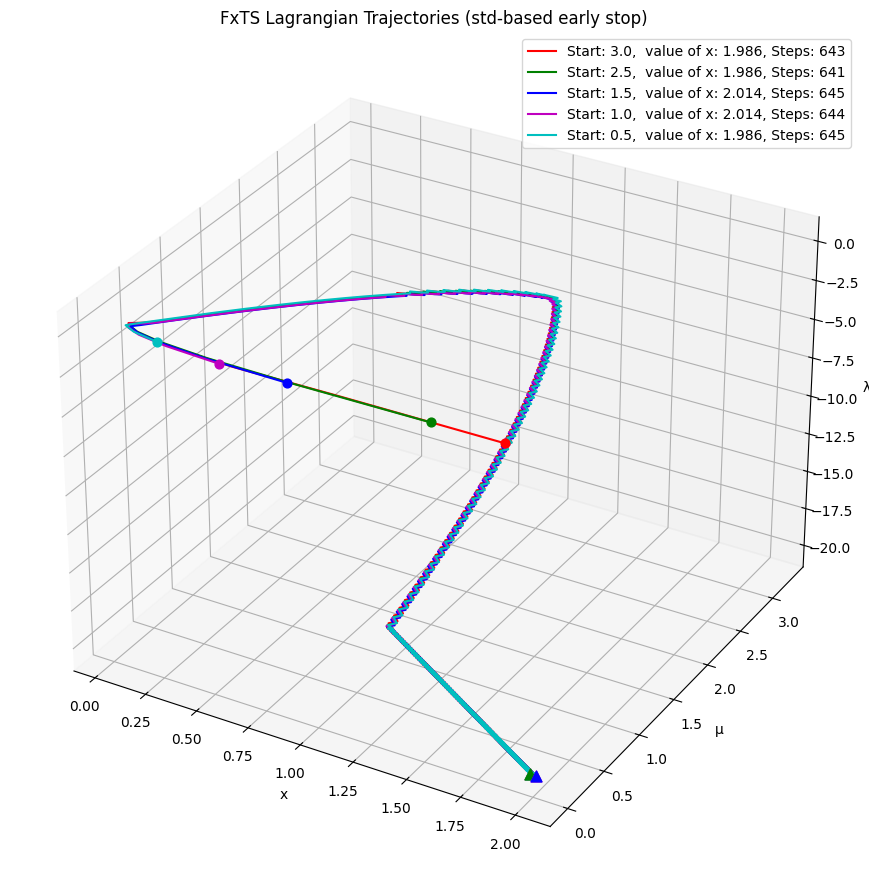

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define functions
def f(x): return 5 * x**2
def g(x): return 1 - x              # inequality: x ≥ 1 → g(x) ≤ 0
def h(x): return x - 2              # equality: x = 2 → h(x) = 0
def grad_f(x): return 10 * x
def grad_g(x): return -1
def grad_h(x): return 1
def L(x, lam, mu): return f(x) + lam * h(x) + mu * g(x)

# FxTS hyperparams
eta = 0.05
p1, p2 = 2.1, 10
c1, c2 = 1.0, 0.5
eps = 1e-8
max_steps = 7000
tol_std = 1e-5

# Starting points
start_points = [3.0, 2.5, 1.5, 1.0, 0.5]
colors = ['r', 'g', 'b', 'm', 'c']

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for idx, x0 in enumerate(start_points):
    x = x0
    lam = 0.0
    mu = 0.0
    traj = []
    x_hist = []

    for step in range(max_steps):
        gx = grad_f(x) + lam * grad_h(x) + mu * grad_g(x)
        gl = h(x)
        gm = g(x)

        norm_gx = abs(gx) + eps
        norm_gl = abs(gl) + eps
        norm_gm = abs(gm) + eps

        delta_x = (c1 * gx / norm_gx**((p1 - 2)/(p1 - 1)) +
                   c2 * gx / norm_gx**((p2 - 2)/(p2 - 1)))
        delta_lam = (c1 * gl / norm_gl**((p1 - 2)/(p1 - 1)) +
                     c2 * gl / norm_gl**((p2 - 2)/(p2 - 1)))
        delta_mu = (c1 * gm / norm_gm**((p1 - 2)/(p1 - 1)) +
                    c2 * gm / norm_gm**((p2 - 2)/(p2 - 1)))

        x -= eta * delta_x
        lam += eta * delta_lam
        mu = max(0.0, mu + eta * delta_mu)

        traj.append((x, mu, lam, L(x, lam, mu)))
        x_hist.append(norm_gx)

        # Stop if std of last 10 x values is small
        if len(x_hist) >= 10:
            if np.std(x_hist[-10:]) < tol_std:
                break

    traj = np.array(traj)
    x_vals, mu_vals, lam_vals, L_vals = traj[:, 0], traj[:, 1], traj[:, 2], traj[:, 3]
    label = f"Start: {x0:.1f},  value of x: {x_vals[-1]:.3f}, Steps: {len(traj)}"
    print (label)
    ax.plot(x_vals, mu_vals, lam_vals, color=colors[idx], label=label)
    ax.scatter(x_vals[0], mu_vals[0], lam_vals[0], color=colors[idx], s=40, marker='o')  # Start
    ax.scatter(x_vals[-1], mu_vals[-1], lam_vals[-1], color=colors[idx], s=60, marker='^')  # End

# Labels
ax.set_xlabel("x")
ax.set_ylabel("μ")
ax.set_zlabel("λ")
ax.set_title("FxTS Lagrangian Trajectories (std-based early stop)")
ax.legend()
plt.tight_layout()
plt.show()


Start: (1.0, 1.0), Steps: 5000, Final (x,y): (0.500, 0.500), λ: -0.999, μ: 0.000, L: 0.5000
Start: (0.5, 1.5), Steps: 5000, Final (x,y): (0.500, 0.500), λ: -1.001, μ: 0.000, L: 0.5000
Start: (-0.5, 1.5), Steps: 5000, Final (x,y): (0.500, 0.500), λ: -1.001, μ: 0.000, L: 0.5000
Start: (1.5, 0.5), Steps: 5000, Final (x,y): (0.500, 0.500), λ: -1.001, μ: 0.000, L: 0.5000


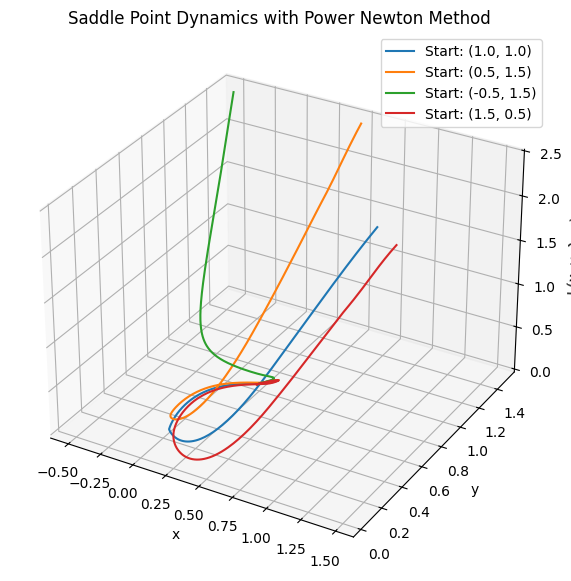

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Objective and constraints
def f(x, y): return x**2 + y**2
def h(x, y): return x + y - 1
def g(x, y): return x**2 + y**2 - 2

def grad_f(x, y): return np.array([2*x, 2*y])
def grad_h(): return np.array([1.0, 1.0])
def grad_g(x, y): return np.array([2*x, 2*y])

def hessian_f(): return np.array([[2, 0], [0, 2]])
def hessian_g(): return np.array([[2, 0], [0, 2]])
def hessian_h(): return np.zeros((2, 2))  # linear constraint

# Lagrangian
def L(x, y, lam, mu):
    return f(x, y) + lam * h(x, y) + mu * g(x, y)

# Hyperparameters
eta = 0.01
p1, p2 = 2.1, 10
c1, c2 = 1.0, 0.5
eps = 1e-8
tol = 1e-3
max_steps = 5000

# Initialization
start_points = [(1.0, 1.0), (0.5, 1.5), (-0.5, 1.5), (1.5, 0.5)]
results = []

for start in start_points:
    x, y = start
    lam, mu = 0.0, 0.0
    traj = []

    for step in range(max_steps):
        z = np.array([x, y])

        # Gradient and Hessian
        grad_L = grad_f(x, y) + lam * grad_h() + mu * grad_g(x, y)
        H = hessian_f() + mu * hessian_g() + lam * hessian_h()

        # Power Newton update
        norm_g = np.linalg.norm(grad_L) + eps
        delta = (c1 * grad_L / norm_g**((p1 - 2)/(p1 - 1)) +
                 c2 * grad_L / norm_g**((p2 - 2)/(p2 - 1)))
        try:
            z = z - eta * np.linalg.inv(H) @ delta
        except np.linalg.LinAlgError:
            break

        x, y = z[0], z[1]

        # Dual updates
        gl = h(x, y)
        gm = g(x, y)

        norm_gl = abs(gl) + eps
        norm_gm = abs(gm) + eps

        delta_lam = (c1 * gl / norm_gl**((p1 - 2)/(p1 - 1)) +
                     c2 * gl / norm_gl**((p2 - 2)/(p2 - 1)))
        delta_mu = (c1 * gm / norm_gm**((p1 - 2)/(p1 - 1)) +
                    c2 * gm / norm_gm**((p2 - 2)/(p2 - 1)))

        lam += eta * delta_lam
        mu = max(0.0, mu + eta * delta_mu)

        traj.append((x, y, mu, lam, L(x, y, lam, mu)))

        if max(np.linalg.norm(grad_L), abs(gl), abs(gm)) < tol:
            break

    traj = np.array(traj)
    print(f"Start: {start}, Steps: {len(traj)}, Final (x,y): ({x:.3f}, {y:.3f}), λ: {lam:.3f}, μ: {mu:.3f}, L: {traj[-1, -1]:.4f}")
    results.append(traj)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, traj in enumerate(results):
    ax.plot(traj[:, 0], traj[:, 1], traj[:, -1], label=f"Start: {start_points[i]}")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("L(x, y, λ, μ)")
ax.set_title("Saddle Point Dynamics with Power Newton Method")
ax.legend()
plt.show()


Start: (1.0,1.0), End: (0.217,0.578), Steps: 704
Start: (0.5,1.5), End: (0.234,0.609), Steps: 639
Start: (-0.5,1.5), End: (0.234,0.610), Steps: 599
Start: (1.5,0.5), End: (0.208,0.598), Steps: 562


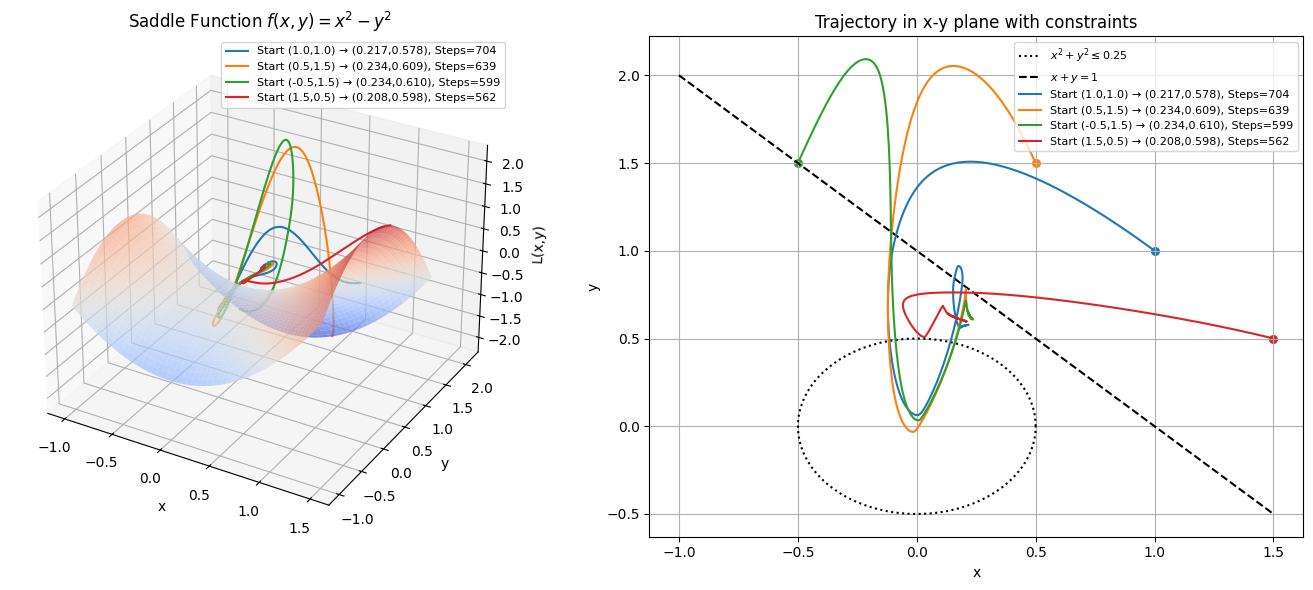

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function definitions
def f(x, y): return x**2 - y**2
def h(x, y): return x + y - 1              # equality
def g(x, y): return x**2 + y**2 - 0.25     # inequality

def grad_f(x, y): return np.array([2*x, -2*y])
def grad_h(x, y): return np.array([1, 1])
def grad_g(x, y): return np.array([2*x, 2*y])
def L(x, y, lam, mu): return f(x, y) + lam * h(x, y) + mu * g(x, y)

# Hyperparameters
eta = 0.005
p1, p2 = 2.1, 10
c1, c2 = 1.0, 0.5
eps = 1e-8
max_steps = 7000
grad_tol = 1e-3
std_tol = 1e-5

starting_points = [(1.0, 1.0), (0.5, 1.5), (-0.5, 1.5), (1.5, 0.5)]
trajectories = []
info = []

for x0, y0 in starting_points:
    x, y = x0, y0
    lam = 0.0
    mu = 0.0
    traj = []
    hist_x, hist_y = [], []

    for step in range(max_steps):
        gx = grad_f(x, y) + lam * grad_h(x, y) + mu * grad_g(x, y)
        gl = h(x, y)
        gm = g(x, y)

        norm_gx = np.linalg.norm(gx) + eps
        norm_gl = abs(gl) + eps
        norm_gm = abs(gm) + eps

        delta_x = c1 * gx / norm_gx**((p1-2)/(p1-1)) + c2 * gx / norm_gx**((p2-2)/(p2-1))
        delta_lam = c1 * gl / norm_gl**((p1-2)/(p1-1)) + c2 * gl / norm_gl**((p2-2)/(p2-1))
        delta_mu = c1 * gm / norm_gm**((p1-2)/(p1-1)) + c2 * gm / norm_gm**((p2-2)/(p2-1))

        x -= eta * delta_x[0]
        y -= eta * delta_x[1]
        lam += eta * delta_lam
        mu = max(0, mu + eta * delta_mu)

        traj.append((x, y, lam, mu, L(x, y, lam, mu)))
        hist_x.append(x)
        hist_y.append(y)

        if len(hist_x) > 10:
            std_x = np.std(hist_x[-10:])
            std_y = np.std(hist_y[-10:])
            if step % 1000 == 0:
              print(f"Step: {step}, std_x: {std_x:.4f}, std_y: {std_y:.4f}")
            if max(std_x, std_y) < grad_tol:
                break

    traj = np.array(traj)
    trajectories.append(traj)
    info.append((x0, y0, x, y, len(traj)))

# ========== Plotting ==========

# Surface Plot
fig = plt.figure(figsize=(14, 6))

# Saddle surface with trajectory
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x_grid = np.linspace(-1, 1.5, 100)
y_grid = np.linspace(-1, 1.5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f(X, Y)

ax1.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

for traj, (x0, y0, x_end, y_end, steps) in zip(trajectories, info):
    ax1.plot(traj[:, 0], traj[:, 1], traj[:, 4],
             label=f"Start ({x0:.1f},{y0:.1f}) → ({x_end:.3f},{y_end:.3f}), Steps={steps}")
ax1.set_title(r"Saddle Function $f(x,y)=x^2 - y^2$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("L(x,y)")
ax1.legend(fontsize=8)

# XY projection with constraints
ax2 = fig.add_subplot(1, 2, 2)
theta = np.linspace(0, 2*np.pi, 100)
circle_x = 0.5 * np.cos(theta)
circle_y = 0.5 * np.sin(theta)
ax2.plot(circle_x, circle_y, 'k:', label=r"$x^2 + y^2 \leq 0.25$")
ax2.plot(x_grid, 1 - x_grid, 'k--', label=r"$x + y = 1$")
for traj, (x0, y0, x_end, y_end, steps) in zip(trajectories, info):
    ax2.plot(traj[:, 0], traj[:, 1],
             label=f"Start ({x0:.1f},{y0:.1f}) → ({x_end:.3f},{y_end:.3f}), Steps={steps}")
    print(f"Start: ({x0:.1f},{y0:.1f}), End: ({x_end:.3f},{y_end:.3f}), Steps: {steps}")
    ax2.scatter(x0, y0, s=30)

ax2.set_title("Trajectory in x-y plane with constraints")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend(fontsize=8)
ax2.grid(True)

plt.tight_layout()
plt.show()